# Assignment 1 - AHP
# Stacey Banks

## Problem Statement

I recently found myself searching for a new job and was fortunate enough to have multiple options:

1. Technical Program Manager Role at Amazon Web Services as a member of the Enterprise Engineering Email Mailbox team, managing all work spanning every employee's email with the ability to work remote. While the cost of benefits is higher than what I am accustomed to, the coverage is great and the compensation package brings a significant raise and signing bonus. Also, it is Amazon, which is a highly prestigious technology company with brand recognition and opportunities to work on different and interesting projects and for career advancement.

2. Technical Project Manager Role at Frontier Technology, Inc. working with the Army to incorporate artificial intelligence into as much of their organization as possible. The cost of benefits is higher than what I am accustomed to and it comes with a small raise from what I was making in my previous position. The role also requires being fully or mostly in person, which would require putting my son in daycare/school sooner than I hoped. Also, if the Army contract ends for some reason, I might be in an odd position since the company does not have a true presence in Pittsburgh.

3. Senior Technical Engagement Manager at Ogilvy working with IBM, one of their biggest clients. The benefits package is good and the job is fully remote, but the pay is only slightly over what I was previously making. The role and industry (advertising) are different from what I have been doing, but the visibility and level seems to be a good career progression. However, I am not entirely sure the work package is something I would be interested in. It does sound like there would be opportunities to work on many different work packages or to move around and advance. Also, since I would be working very closely with IBM, I would be able to expand my professional network.

Decision Factors:
* Total Compensation Package (Base Salary, Bonus, Stocks, 401K)
* Benefits (Cost, Coverage)
* Type of Work/Projects
* Career Advancement

I would usually go about making a decision like this by weighing the pros and cons of each option, as well as how well I think it meets my most important considerations. I also compare the compensation and benefits costs of each option against each other and what I made and paid in my current/previous job to determine how the package looks. There is also obviously a gut reaction that comes into play as well, thinking about which one do I feel the best about and what reservations I may have.

### 1. Setup the Model

Here's a visualization of the model:

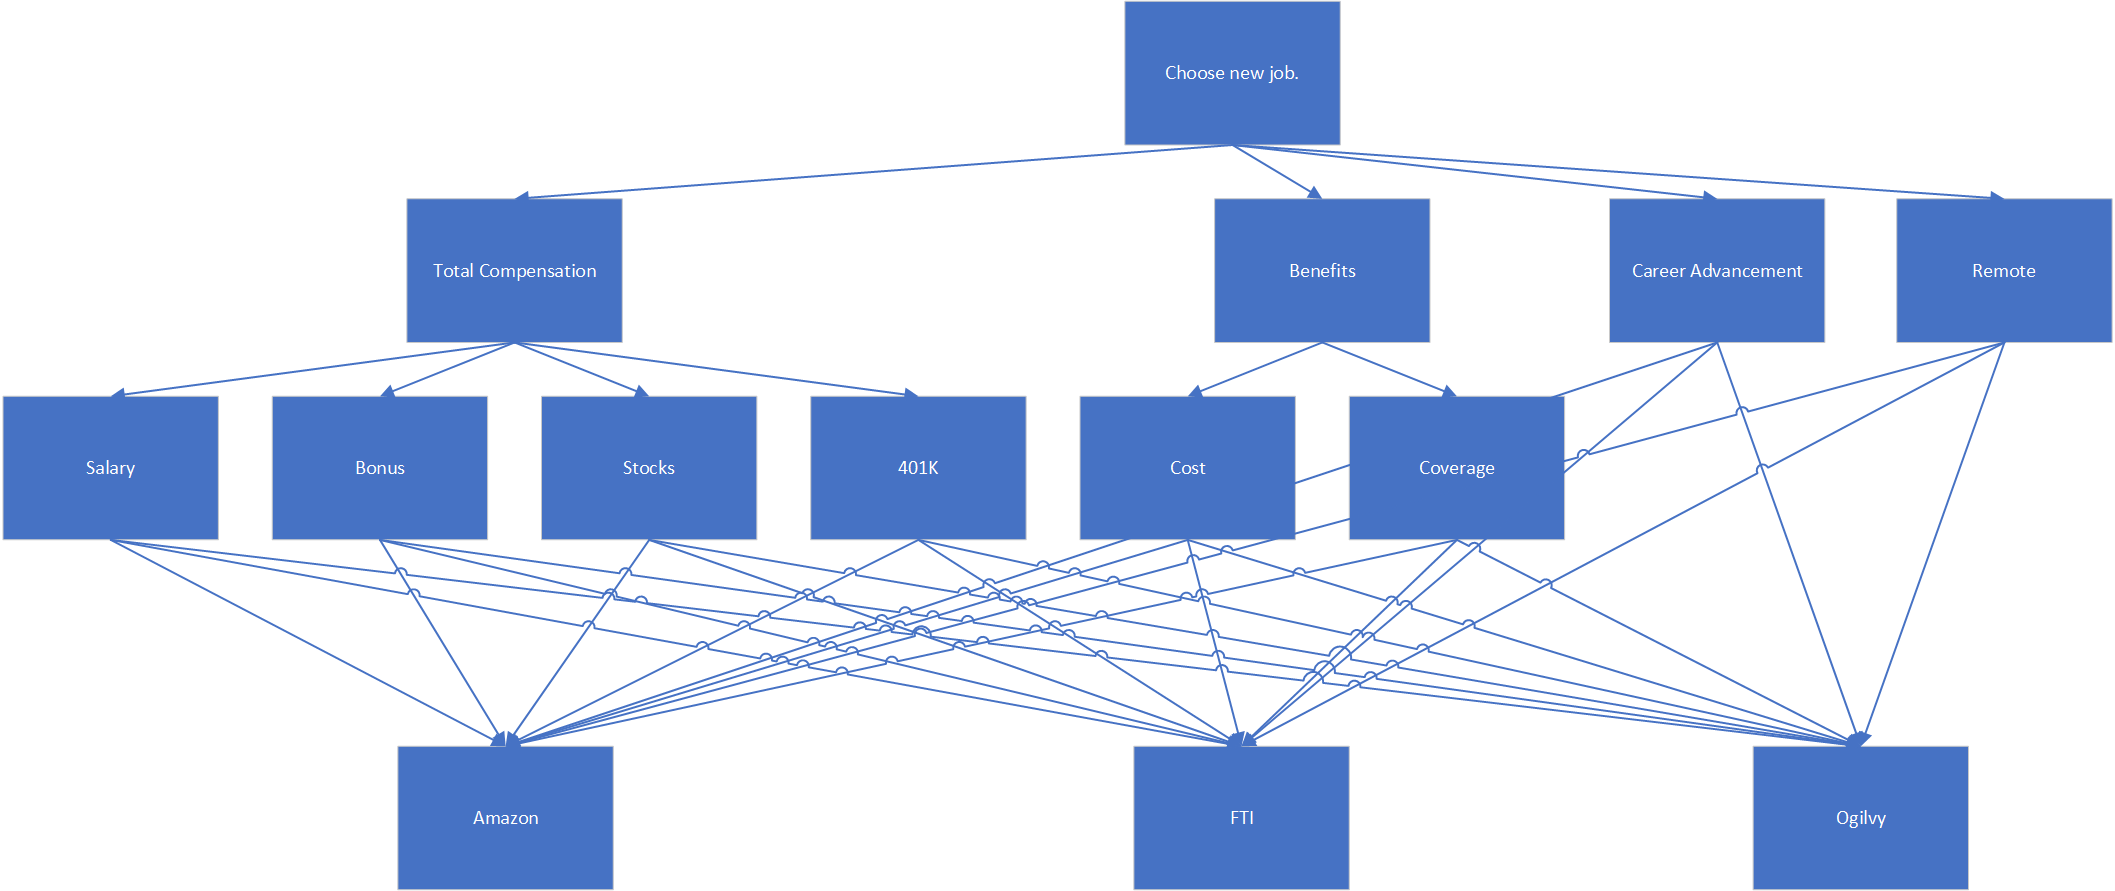

In [1]:
# import the required components
from AhpAnpLib import inputs_AHPLib as input
from AhpAnpLib import structs_AHPLib as str
from AhpAnpLib import calcs_AHPLib as calc


# Create a model
jobOfferModel = str.Model("JobOffer")

### 2. Create the goal, criteria, subcriteria, and alternative nodes.

In [2]:
# Create goal node
goalNode = str.Node("Goal", 0) # Name, Order
print("Goal:\n", goalNode)

Goal:
 Goal order: 0


In [3]:
# Create criteria nodes
compensationNode = str.Node("Total Compensation", 1)
benefitsNode = str.Node("Benefits", 2)
projectsNode = str.Node("Projects", 3)
advancementNode = str.Node("Career Advancement", 4)
remoteNode = str.Node("Remote", 5)
print("Criteria:\n",compensationNode, "\n", benefitsNode, "\n", projectsNode, "\n", advancementNode, "\n", remoteNode)

Criteria:
 Total Compensation order: 1 
 Benefits order: 2 
 Projects order: 3 
 Career Advancement order: 4 
 Remote order: 5


In [4]:
# Create compensation subcriteria nodes
salaryNode = str.Node("Base Salary", 6)
bonusNode = str.Node("Bonus", 7)
stocksNode = str.Node("Stock Options", 8)
savingsNode = str.Node("401K", 9)

# Create benefits subcriteria nodes
costNode = str.Node("Cost", 10)
coverageNode = str.Node("Coverage", 11)

In [5]:
# Create alternative nodes
aws = str.Node("AWS", 12)
fti = str.Node("FTI", 13)
ogilvy = str.Node("Ogilvy", 14)
print("Alternatives:\n", aws, "\n", fti, "\n", ogilvy)

Alternatives:
 AWS order: 12 
 FTI order: 13 
 Ogilvy order: 14


### 3. Create the goal, critera, subcriteria, and alternative clusters, add nodes to them, and then add clusters to the model.

In [6]:
# Create clusters: Goal, Critera, Alternatives
goalCluster = str.Cluster("Goal", 0)
criteriaCluster = str.Cluster("Criteria", 2)
compSubcriteriaCluster = str.Cluster("Total Comp Subcriteria", 3)
benefitsSubcriteriaCluster = str.Cluster("Benefits Subcriteria", 4)
altCluster = str.Cluster("Alternatives", 5)

In [7]:
# Update cluster display order
goalCluster.updateC_DisplayOrder(1)
criteriaCluster.updateC_DisplayOrder(2)
compSubcriteriaCluster.updateC_DisplayOrder(3)
benefitsSubcriteriaCluster.updateC_DisplayOrder(4)
altCluster.updateC_DisplayOrder(5)

In [8]:
# Add nodes to clusters
goalCluster.addNode2Cluster(goalNode)

criteriaCluster.addNode2Cluster(compensationNode)
criteriaCluster.addNode2Cluster(benefitsNode)
criteriaCluster.addNode2Cluster(projectsNode)
criteriaCluster.addNode2Cluster(advancementNode)
criteriaCluster.addNode2Cluster(remoteNode)

compSubcriteriaCluster.addNode2Cluster(salaryNode)
compSubcriteriaCluster.addNode2Cluster(bonusNode)
compSubcriteriaCluster.addNode2Cluster(stocksNode)
compSubcriteriaCluster.addNode2Cluster(savingsNode)

benefitsSubcriteriaCluster.addNode2Cluster(costNode)
benefitsSubcriteriaCluster.addNode2Cluster(coverageNode)

altCluster.addNode2Cluster(aws)
altCluster.addNode2Cluster(fti)
altCluster.addNode2Cluster(ogilvy)

In [9]:
# Add clusters to model
jobOfferModel.addCluster2Model(goalCluster)
jobOfferModel.addCluster2Model(criteriaCluster)
jobOfferModel.addCluster2Model(compSubcriteriaCluster)
jobOfferModel.addCluster2Model(benefitsSubcriteriaCluster)
jobOfferModel.addCluster2Model(altCluster)

### 4. Setup connections.

In [10]:
# Setup node connections

# Create all connections from the given node named Goal to given cluster named Criteria
jobOfferModel.addNodeConnectionFromNodeToAllNodesOfCluster("Goal", "Criteria")


# Create all connections from the given node named Total Compensation to given cluster named Total Comp Subcriteria
jobOfferModel.addNodeConnectionFromNodeToAllNodesOfCluster("Total Compensation", "Total Comp Subcriteria")
# Create all connections from given cluster named Total Comp Subcriteria to given cluster named Alternatives
jobOfferModel.addNodeConnectionFromAllNodesToAllNodesOfCluster("Total Comp Subcriteria", "Alternatives")

# Create all connections from given node named Benefits to given cluster named Benefits Subcriteria
jobOfferModel.addNodeConnectionFromNodeToAllNodesOfCluster("Benefits", "Benefits Subcriteria")
# Create all connections from given cluster named Benefits Subcriteria to given cluster named Alternatives
jobOfferModel.addNodeConnectionFromAllNodesToAllNodesOfCluster("Benefits Subcriteria", "Alternatives")

# Create all connections from the given node named Projects to given cluster named Alternatives
jobOfferModel.addNodeConnectionFromNodeToAllNodesOfCluster("Projects", "Alternatives")

# Create all connections from given node named Career Advancement to given cluster named Alternatives
jobOfferModel.addNodeConnectionFromNodeToAllNodesOfCluster("Career Advancement", "Alternatives")

# Create all connections from given node named Remote to given cluster named Alternatives
jobOfferModel.addNodeConnectionFromNodeToAllNodesOfCluster("Remote", "Alternatives")

In [11]:
# Show all cluster connections
print("Cluster Connections:")
jobOfferModel.showAllClusterConnections()

Cluster Connections:
Connection(s) from cluster Goal order: 1
 to: Criteria order: 2
Connection(s) from cluster Criteria order: 2
 to: Total Comp Subcriteria order: 3
 to: Benefits Subcriteria order: 4
 to: Alternatives order: 5
Connection(s) from cluster Total Comp Subcriteria order: 3
 to: Alternatives order: 5
Connection(s) from cluster Benefits Subcriteria order: 4
 to: Alternatives order: 5
No connections from Alternatives


### 5. Review all connections.

In [12]:
# Show all connections
print("Node Connections:")
jobOfferModel.showAllNodeConnections()

Node Connections:
Connections from node Goal order: 0
 to: Total Compensation order: 1
 to: Benefits order: 2
 to: Projects order: 3
 to: Career Advancement order: 4
 to: Remote order: 5
Connections from node Total Compensation order: 1
 to: Base Salary order: 6
 to: Bonus order: 7
 to: Stock Options order: 8
 to: 401K order: 9
Connections from node Benefits order: 2
 to: Cost order: 10
 to: Coverage order: 11
Connections from node Projects order: 3
 to: AWS order: 12
 to: FTI order: 13
 to: Ogilvy order: 14
Connections from node Career Advancement order: 4
 to: AWS order: 12
 to: FTI order: 13
 to: Ogilvy order: 14
Connections from node Remote order: 5
 to: AWS order: 12
 to: FTI order: 13
 to: Ogilvy order: 14
Connections from node Base Salary order: 6
 to: AWS order: 12
 to: FTI order: 13
 to: Ogilvy order: 14
Connections from node Bonus order: 7
 to: AWS order: 12
 to: FTI order: 13
 to: Ogilvy order: 14
Connections from node Stock Options order: 8
 to: AWS order: 12
 to: FTI order

### 6. Generate and export Excel file.

In [13]:
input.export4ExcelQuestFull(jobOfferModel, "AHP_JobOffer_DM2022_Excel_Empty.xlsx")

### 7. Calculate results and save to excel files.

In [14]:
inputFilePath="AHP_JobOffer_DM2022_Excel_filledin.xlsx"
outputFilepath = "AHP_JobOffer_DM2022_Results.xlsx"
# Import filledin jugments to calculate resuts
calc.calcAHPMatricesSave2File(jobOfferModel,inputFilePath,outputFilepath,True,False,True,True)

Saved inconsistency for cluster-node :  Criteria - Goal
Saved inconsistency for cluster-node :  Total Comp Subcriteria - Total Compensation
Saved inconsistency for cluster-node :  Benefits Subcriteria - Benefits
Saved inconsistency for cluster-node :  Alternatives - Projects
Saved inconsistency for cluster-node :  Alternatives - Career Advancement
Saved inconsistency for cluster-node :  Alternatives - Remote
Saved inconsistency for cluster-node :  Alternatives - Base Salary
Saved inconsistency for cluster-node :  Alternatives - Bonus
Saved inconsistency for cluster-node :  Alternatives - Stock Options
Saved inconsistency for cluster-node :  Alternatives - 401K
Saved inconsistency for cluster-node :  Alternatives - Cost
Saved inconsistency for cluster-node :  Alternatives - Coverage
---------------------------------------------------------------------------

Inconsistency indices:
[0.148, 0.03, 0.0, 0.052, 0.09, 0.0, 0.024, -0.0, -0.0, 0.0, 0.0, 0.004]
----------------------------------

### 8. Sensitivity Analysis

multiplier 1.1392601153864916
supermatrix [[0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000 0.000 0.000]
 [0.122 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000 0.000 0.000]
 [0.324 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000 0.000 0.000]
 [0.112 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000 0.000 0.000]
 [0.141 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000 0.000 0.000]
 [0.300 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000 0.000 0.000]
 [0.000 0.459 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000 0.000 0.000]
 [0.000 0.093 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000 0.000 0.000]
 [0.000 0.143 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000 0.000 0.000]
 [0.000 0.305 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000 0.000 0.000]
 [0.000 

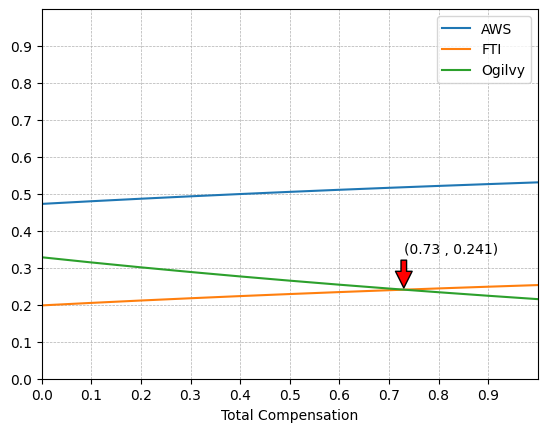

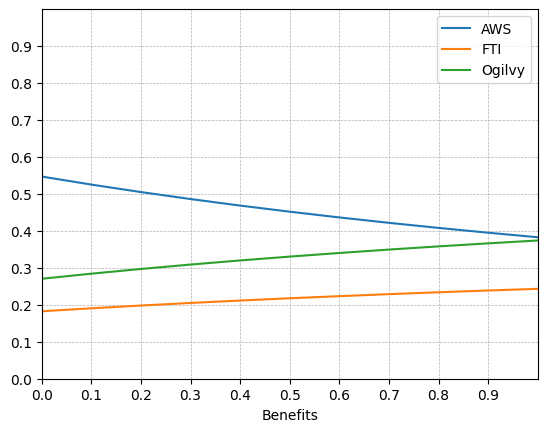

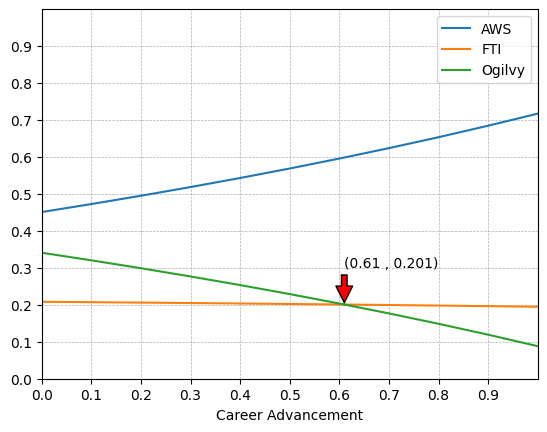

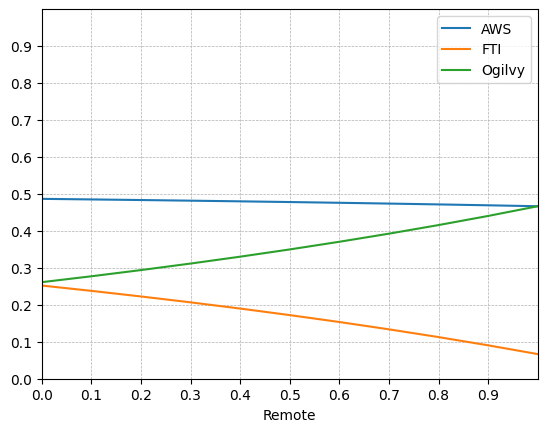

In [15]:
# sensitivity analysis
calc.sensitivityCellSupermatrixPlot(jobOfferModel,"Alternatives",outputFilepath,"Total Compensation","Benefits","Career Advancement","Remote")